In [1]:
from sgps import StretchedGridPoisson
import numpy as np
from matplotlib import pyplot as plt

In [51]:
stretchedGrid = True
stretchedName = '_stretchedGrid_' if stretchedGrid else '_evenGrid_'
numOfIt = 1000
filename = './output/sgpsClassTest/' + stretchedName + 'iter' + str(numOfIt) + '.npz'

In [52]:
# Defining the domain, can be uneven
# The x, y, and z values defined below are grid centers
dx = 1000 # m
dy = 1000 # m

nx = 86 # 100
ny = 86 # 100
nz = 86 #100

# x = dx*np.arange(0,nx)
# y = dz*np.arange(0,ny)

# Stretched grid to match Shelby's stretched grid
if stretchedGrid:
    z = np.array(
    [   50.0,  153.94739 ,   265.7895  ,   385.52637,    513.15796,
       648.68427,    792.10535,    943.42114,   1102.6316,    1269.7368,
      1444.7369,    1627.6317,    1818.4211,    2017.1055,    2223.6843,
      2438.1582,    2660.5264,    2890.7896,    3128.9475,    3375.,
      3625. ,       3875. ,       4125. ,       4375. ,       4625.,
      4875. ,       5125. ,       5375. ,       5625. ,       5875.,
      6125. ,       6375. ,       6625. ,       6875. ,       7125.,
      7375. ,       7625. ,       7875. ,       8125. ,       8375.,
      8625. ,       8875. ,       9125. ,       9375. ,       9625.,
      9875. ,      10125. ,      10375. ,      10625. ,      10875.,
     11125. ,      11375. ,      11625. ,      11875. ,      12125.,
     12375. ,      12625. ,      12875. ,      13125. ,      13375.,
     13625. ,      13875. ,      14125. ,      14375. ,      14625.,
     14875. ,      15125. ,      15375. ,      15625. ,      15875.,
     16125. ,      16375. ,      16625. ,      16875. ,      17125.,
     17375. ,      17625. ,      17875. ,      18125. ,      18375.,
     18625. ,      18875. ,      19125. ,      19375. ,      19625.,
     19875. ]
    )/10000.
else:
    z = np.arange(50,19625,(19625-50)/nz)/10000
    
x = z.copy()
y = z.copy()

X = centersToEdges(x)
Y = centersToEdges(y)
Z = centersToEdges(z)

86 87
86 87
86 87


In [64]:
phi = np.zeros((nx,ny,nz))
f = phi.copy()

sgps = StretchedGridPoisson(x,y,z,phi,f)
botBoundary = 100*np.ones((nx,ny))
frontBoundary = 100*np.ones((nx,nz))
sgps.setDirichlet(botBoundary,"bottom")
sgps.setDirichlet(frontBoundary,"front")

def neumBac(x,y,z,phi,f):
    return 1000.

sgps.setNeumann(neumBac,"back")

In [65]:
sgps.solvePoisson(numOfIt)

Iteration:  0
Iteration:  200
Iteration:  400
Iteration:  600
Iteration:  800


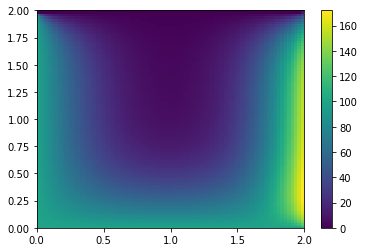

In [66]:
im = plt.pcolormesh(Y,Z,np.transpose(sgps.soln[np.int(nx/2),:,:]))
cb = plt.colorbar(im)